Regular lab Question – 2
1. Exploring Activation Functions in Neural Networks

1. Implement and Visualize Activation Functions:
o Implement the following activation functions in Python:
▪ Step Function
▪ Sigmoid Function (Binary and Bipolar)
▪ Tanh Function
▪ ReLU Function

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Step Function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Binary Sigmoid Function
def sigmoid_binary(x):
    return 1 / (1 + np.exp(-x))

# Bipolar Sigmoid Function
def sigmoid_bipolar(x):
    return 2 / (1 + np.exp(-x)) - 1

# Tanh Function
def tanh_function(x):
    return np.tanh(x)

# ReLU Function
def relu_function(x):
    return np.maximum(0, x)

# To activation functions
def plot_activation_function(x, y, title):
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.grid(True)
    plt.show()


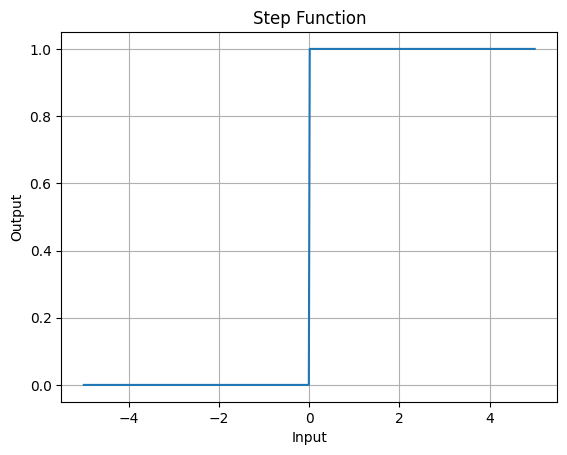

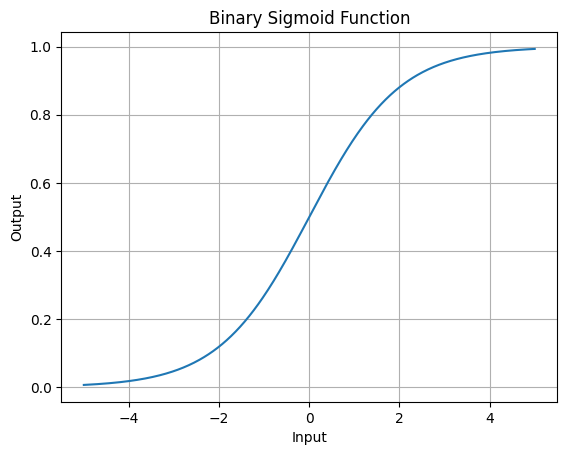

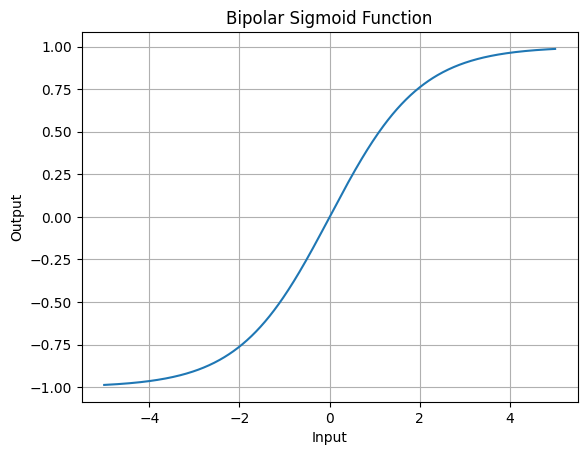

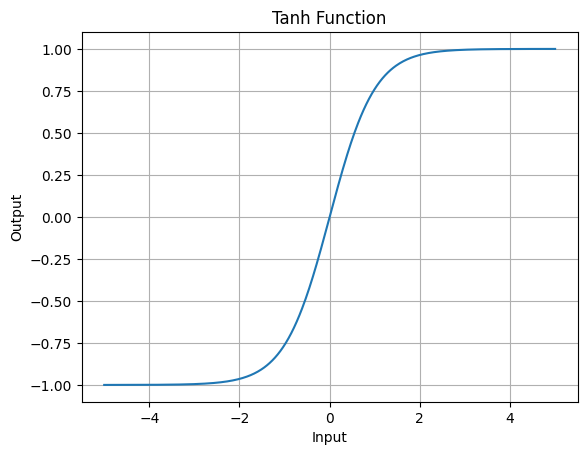

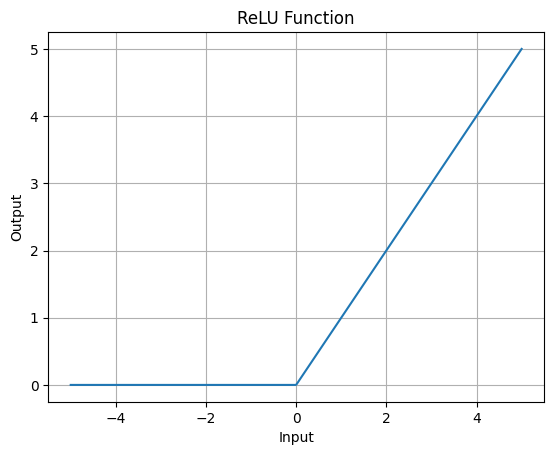

In [14]:
# Input values for plotting
x = np.linspace(-5, 5, 500)

# Plotting each function
plot_activation_function(x, step_function(x), "Step Function")
plot_activation_function(x, sigmoid_binary(x), "Binary Sigmoid Function")
plot_activation_function(x, sigmoid_bipolar(x), "Bipolar Sigmoid Function")
plot_activation_function(x, tanh_function(x), "Tanh Function")
plot_activation_function(x, relu_function(x), "ReLU Function")

2. Implement a Simple Neural Network:
• Create a simple neural network with one hidden layer using each activation
function (sigmoid, tanh, and ReLU).
• Train the network on a binary classification task (e.g., XOR problem) using a
small dataset.
• Compare the performance of the neural network with different activation
functions.

In [15]:
from sklearn.metrics import accuracy_score

# XOR problem dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])  # Expected output (XOR)

In [16]:
# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def tanh(x):
    return np.tanh(x)


def relu(x):
    return np.maximum(0, x)


# Derivatives for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)


def tanh_derivative(x):
    return 1 - np.power(x, 2)


def relu_derivative(x):
    return np.where(x <= 0, 0, 1)

In [17]:
# Feedforward and backpropagation functions for different activation functions
class SimpleNeuralNetwork:
    def __init__(
        self,
        activation_func,
        activation_derivative,
        hidden_neurons=4,
        lr=0.1,
        epochs=10000,
    ):
        self.input_neurons = 2
        self.hidden_neurons = hidden_neurons
        self.output_neurons = 1
        self.activation_func = activation_func
        self.activation_derivative = activation_derivative
        self.lr = lr
        self.epochs = epochs

        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(
            self.input_neurons, self.hidden_neurons
        )
        self.bias_hidden = np.random.rand(1, self.hidden_neurons)
        self.weights_hidden_output = np.random.rand(
            self.hidden_neurons, self.output_neurons
        )
        self.bias_output = np.random.rand(1, self.output_neurons)

    def feedforward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.activation_func(self.hidden_input)
        self.final_input = (
            np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        )
        self.final_output = sigmoid(
            self.final_input
        )  # Output layer uses sigmoid activation for binary classification
        return self.final_output

    def backpropagate(self, X, y):
        output_error = y - self.final_output  # Error in output
        output_delta = output_error * sigmoid_derivative(self.final_output)

        hidden_error = output_delta.dot(
            self.weights_hidden_output.T
        )  # Error in hidden layer
        hidden_delta = hidden_error * self.activation_derivative(self.hidden_output)

        # Update weights and biases using gradient descent
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.lr
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * self.lr
        self.weights_input_hidden += X.T.dot(hidden_delta) * self.lr
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * self.lr

    def train(self, X, y):
        for epoch in range(self.epochs):
            # Forward pass
            self.feedforward(X)
            # Backward pass
            self.backpropagate(X, y)

    def predict(self, X):
        return np.round(self.feedforward(X))


Training with Sigmoid activation function:
Predictions: [0. 1. 1. 0.]
Accuracy: 1.0

Training with Tanh activation function:
Predictions: [0. 1. 1. 0.]
Accuracy: 1.0

Training with ReLU activation function:
Predictions: [1. 0. 1. 0.]
Accuracy: 0.5


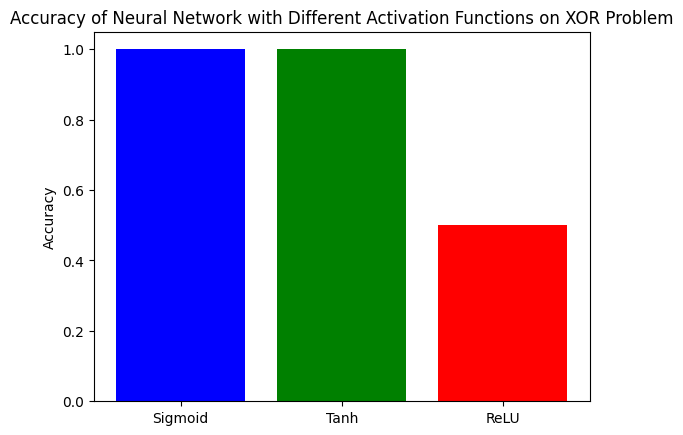

In [18]:
# Training neural network for different activation functions
activation_functions = {
    "Sigmoid": (sigmoid, sigmoid_derivative),
    "Tanh": (tanh, tanh_derivative),
    "ReLU": (relu, relu_derivative),
}

# To store accuracy results
accuracy_results = {}

# Training and evaluating network for each activation function
for activation_name, (
    activation_func,
    activation_derivative,
) in activation_functions.items():
    print(f"\nTraining with {activation_name} activation function:")
    nn = SimpleNeuralNetwork(activation_func, activation_derivative)
    nn.train(X, y)

    # Predictions
    predictions = nn.predict(X)

    # Calculate accuracy
    accuracy = accuracy_score(y, predictions)
    accuracy_results[activation_name] = accuracy

    print(f"Predictions: {predictions.ravel()}")
    print(f"Accuracy: {accuracy}")

# Plotting accuracy comparison
plt.bar(
    accuracy_results.keys(), accuracy_results.values(), color=["blue", "green", "red"]
)
plt.title(
    "Accuracy of Neural Network with Different Activation Functions on XOR Problem"
)
plt.ylabel("Accuracy")
plt.show()